# [Quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#quick-start-guide)
This tutorial covers some basic usage patterns and best practices to help you get started with Matplotlib.

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# A simple example
Matplotlib graphs your data on Figures (e.g., windows, Jupyter widgets, etc.), each of which can contain one or more Axes, an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, x-y-z in a 3D plot, etc.). The simplest way of creating a Figure with an Axes is using `pyplot.subplots`. We can then use `Axes.plot` to draw some data on the Axes:

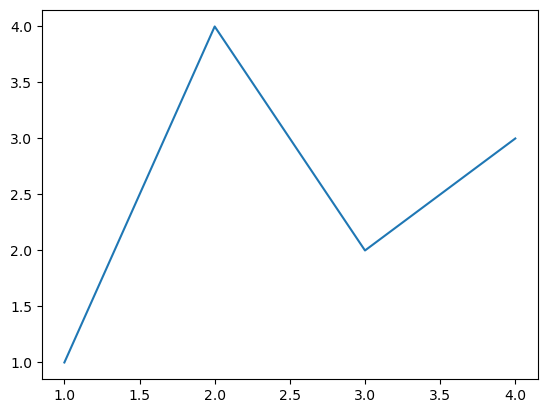

In [4]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.
plt.show()

Note that to get this Figure to display, you may have to call plt.show(), depending on your backend. For more details of Figures and backends, see Creating, viewing, and saving Matplotlib Figures.

# Parts of a Figure
Here are the components of a Matplotlib Figure.

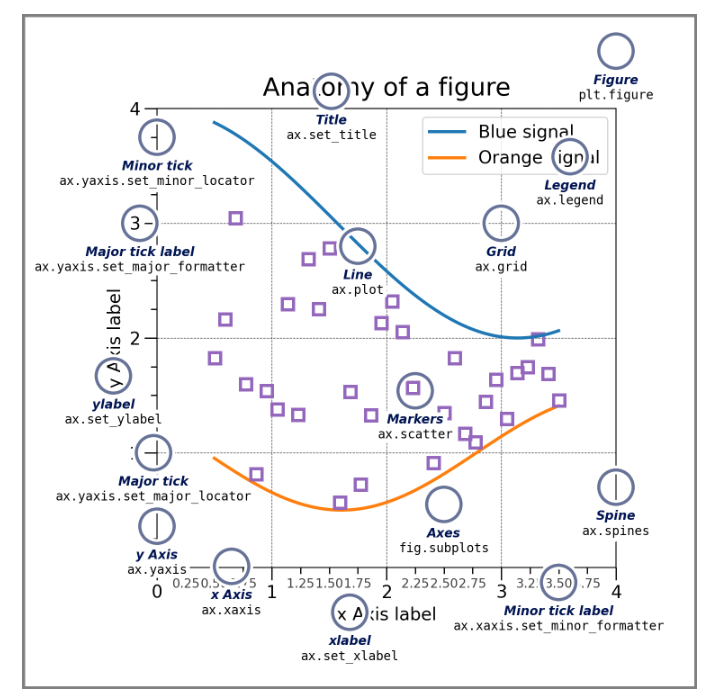

# Figure
The whole figure. The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc), and even nested subfigures.

The easiest way to create a new Figure is with pyplot:

In [5]:
fig = plt.figure()  # an empty figure with no Axes

<Figure size 640x480 with 0 Axes>

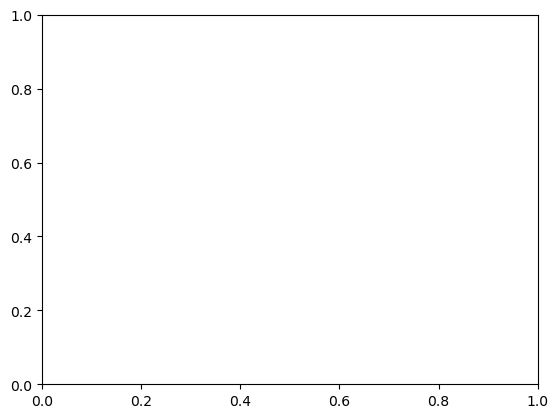

In [6]:
fig, ax = plt.subplots()  # a figure with a single Axes

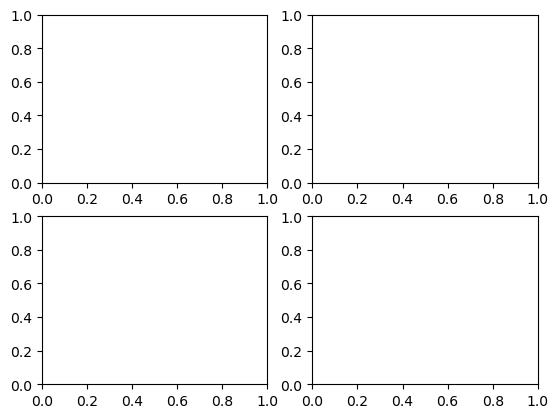

In [7]:
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

No handles with labels found to put in legend.


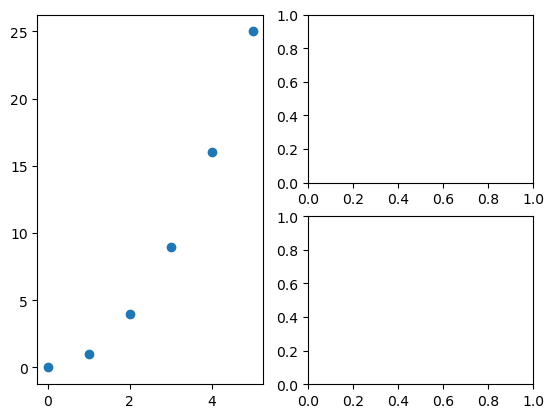

In [8]:
# a figure with one axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right-top'],
                               ['left', 'right_bottom']])
x = np.arange(6)
y = np.square(x)
axs['left'].scatter(x, y)
ax.legend()
plt.show()


# Axes
An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each Axes also has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

The Axes class and its member functions are the primary entry point to working with the OOP interface, and have most of the plotting methods defined on them (e.g. ax.plot(), shown above, uses the plot method)

# Axis
These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

# Artist
Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

In [9]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
b_asarray

array([[1, 2],
       [3, 4]])

Text(0, 0.5, 'entry b')

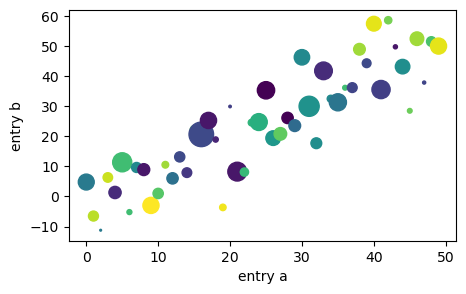

In [10]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 3))
# 具体地，ax 表示坐标系对象
# scatter() 方法则用来在该坐标系上绘制散点图。
# 其中，'a' 和 'b' 分别代表 x 轴和 y 轴上的坐标值，
# c='c' 表示每个点的颜色由变量 c 决定
# s='d' 表示每个点的大小由变量 d 决定，
# data=data 表示数据来源于名为 data 的 DataFrame 对象。
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

In [11]:
# 具体地，randn() 方法生成符合标准正态分布（均值为 0，方差为 1）的随机数。因此，输出的数组中包含 50 个来自标准正态分布的随机数。
np.random.randn(50)

array([ 9.20133074e-01,  4.16248081e-01,  6.88298652e-01, -3.27091982e-02,
        5.42544505e-01, -5.88782966e-03, -1.36174511e+00, -3.17451269e-01,
       -2.32676449e+00,  8.79554336e-01, -6.85958787e-01, -1.19423245e+00,
       -1.22019276e+00, -8.51083359e-01,  6.73740039e-01,  6.35835705e-01,
        8.35274905e-01,  1.81992918e-01,  1.23229074e+00, -9.96841814e-01,
       -8.04237843e-01,  1.83322987e+00,  8.40462099e-02, -4.66226311e-01,
       -4.58791439e-01, -6.23694657e-01,  6.45132873e-01, -1.85158063e+00,
        8.43342331e-01,  1.09386676e+00,  4.56575777e-01,  2.73130831e-01,
       -1.91682051e+00,  1.62999085e-01,  9.20437057e-01, -6.67275456e-01,
       -4.66619092e-02, -6.13770999e-01, -3.74933938e-01,  5.16940818e-01,
        5.38914484e-01,  1.52495903e-03, -1.07786263e-01,  6.90346916e-01,
        1.48077994e+00,  9.05456081e-01,  1.63013950e+00,  5.30195841e-02,
       -1.67786677e+00, -3.06046411e-01])

# Types of inputs to plotting functions
Plotting functions expect `numpy.array` or `numpy.ma.masked_array` as input, or objects that can be passed to `numpy.asarray`. Classes that are similar to arrays ('array-like') such as pandas data objects and `numpy.matrix` may not work as intended. Common convention is to convert these to numpy.array objects prior to plotting. For example, to convert a `numpy.matrix`

In [12]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
b_asarray

array([[1, 2],
       [3, 4]])

Most methods will also parse an addressable object like a dict, a numpy.recarray, or a pandas.DataFrame. Matplotlib allows you to provide the data keyword argument and generate plots passing the strings corresponding to the x and y variables.

Text(0, 0.5, 'entry b')

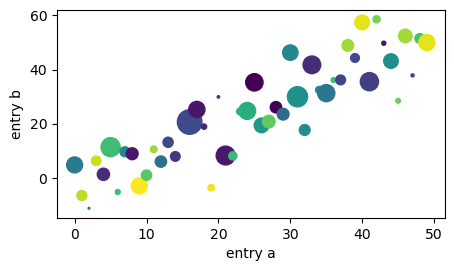

In [13]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

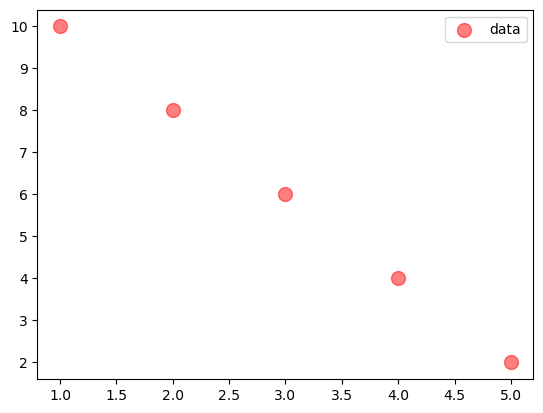

In [14]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [10, 8, 6, 4, 2]

fig, ax = plt.subplots()
ax.scatter(x, y, s=100, c='red', alpha=0.5, marker='o', label='data')
ax.legend()
plt.show()

# Coding styles
## The explicit and the implicit interfaces
As noted above, there are essentially two ways to use Matplotlib:

- Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").

- Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting.

See Matplotlib Application Interfaces (APIs) for an explanation of the tradeoffs between the implicit and explicit interfaces.

So one can use the OO-style

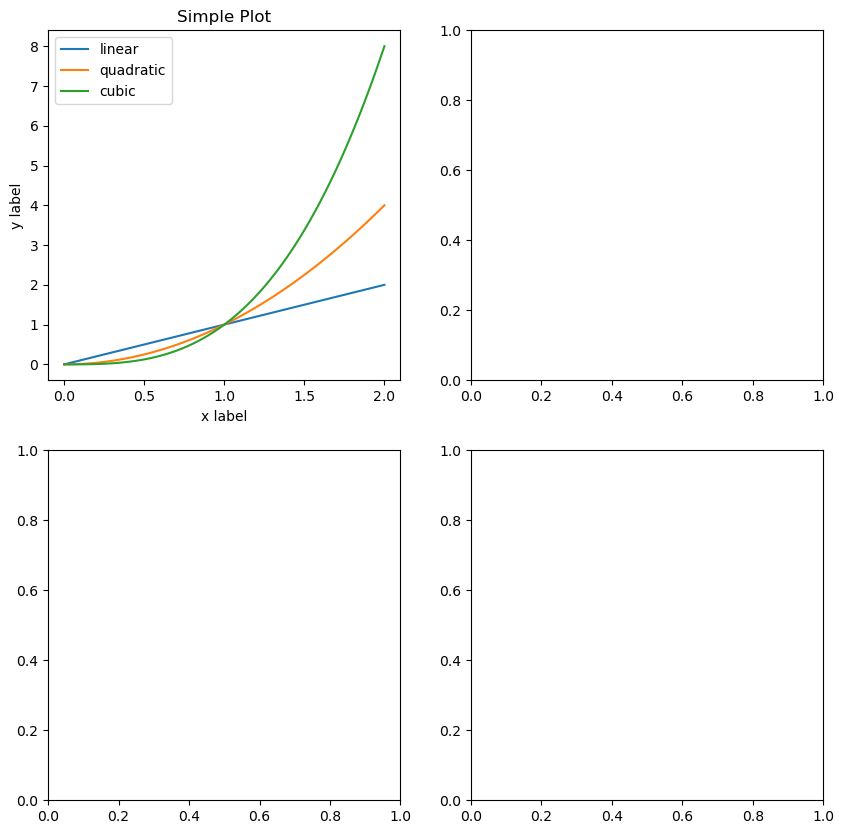

In [15]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(2,2,figsize=(10, 10))
first_ax = ax[0, 0]
first_ax.plot(x, x, label='linear')  # Plot some data on the axes.
first_ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
first_ax.plot(x, x**3, label='cubic')  # ... and some more.
first_ax.set_xlabel('x label')  # Add an x-label to the axes.
first_ax.set_ylabel('y label')  # Add a y-label to the axes.
first_ax.set_title("Simple Plot")  # Add a title to the axes.
first_ax.legend()  # Add a legend （图例）.

or the pyplot-style:

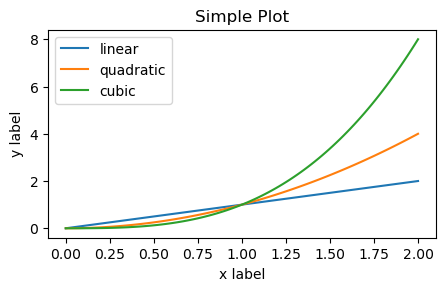

In [16]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7))
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

(In addition, there is a third approach, for the case when embedding Matplotlib in a GUI application, which completely drops pyplot, even for figure creation. See the corresponding section in the gallery for more info: [Embedding Matplotlib in graphical user interfaces](https://matplotlib.org/stable/gallery/user_interfaces/index.html#user-interfaces).)

Matplotlib's documentation and examples use both the OO and the pyplot styles. In general, we suggest using the OO style, particularly for complicated plots, and functions and scripts that are intended to be reused as part of a larger project. However, the pyplot style can be very convenient for quick interactive work.

# Making a helper functions
If you need to make the same plots over and over again with different data sets, or want to easily wrap Matplotlib methods, use the recommended signature function below.

In [17]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

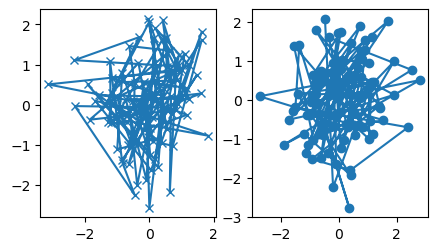

In [18]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

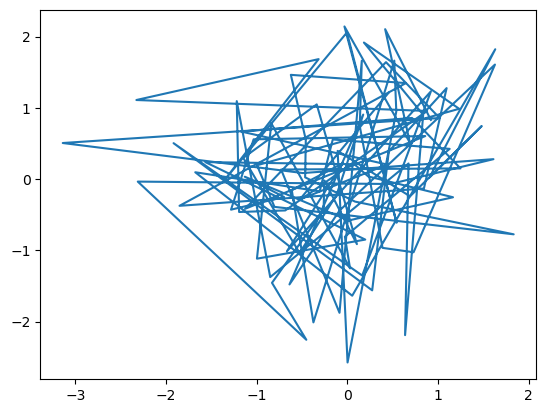

In [19]:
fig, ax = plt.subplots()
ax.plot(data1, data2)

Text(0.5, 0, 'x')

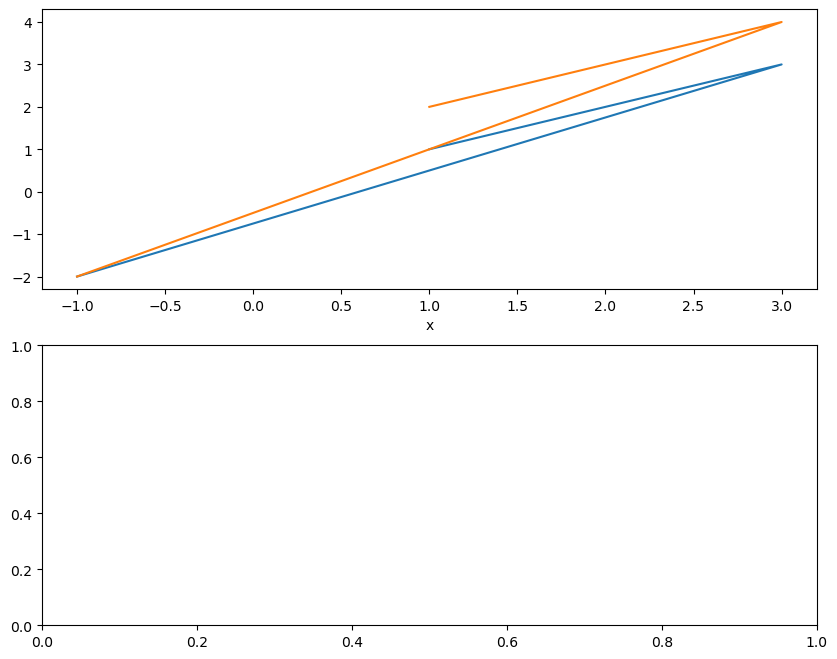

In [20]:
fig, (ax1, ax2)= plt.subplots(2, 1, figsize=(10, 8))
x = [1, 2, 3, -1]
y = [1, 2, 3, -2]

ax1.plot(np.array(x), np.array(y))

y = [2, 3, 4, -2]

ax1.plot(np.array(x), np.array(y))

ax1.set_xlabel('x')


# Styling Artists
Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a "setter" on the Artist. In the plot below we manually set the color, linewidth, and linestyle of the Artists created by plot, and we set the linestyle of the second line after the fact with set_linestyle.

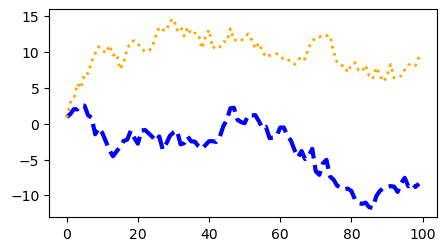

In [21]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':')

In [22]:
base = [1, 2, 3]
# 累加求和
np.cumsum(base)

array([1, 3, 6], dtype=int32)

### Colors
Matplotlib has a very flexible array of colors that are accepted for most Artists; see the colors tutorial for a list of specifications. Some Artists will take multiple colors. i.e. for a scatter plot, the edge of the markers can be different colors from the interior:

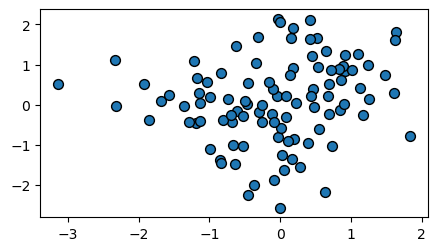

In [23]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k')

### Linewidths, linestyles, and markersizes
Line widths are typically in typographic points (1 pt = 1/72 inch) and available for Artists that have stroked lines. Similarly, stroked lines can have a linestyle. See the linestyles example.

Marker size depends on the method being used. plot specifies markersize in points, and is generally the "diameter" or width of the marker. scatter specifies markersize as approximately proportional to the visual area of the marker. There is an array of markerstyles available as string codes (see markers), or users can define their own MarkerStyle (see Marker reference):

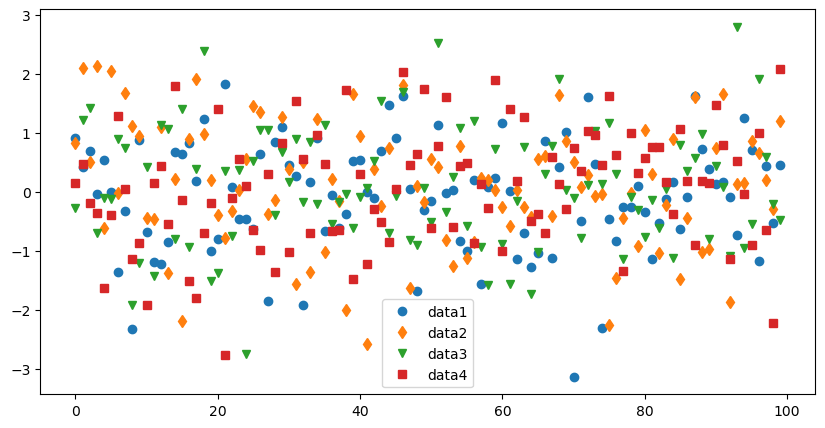

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

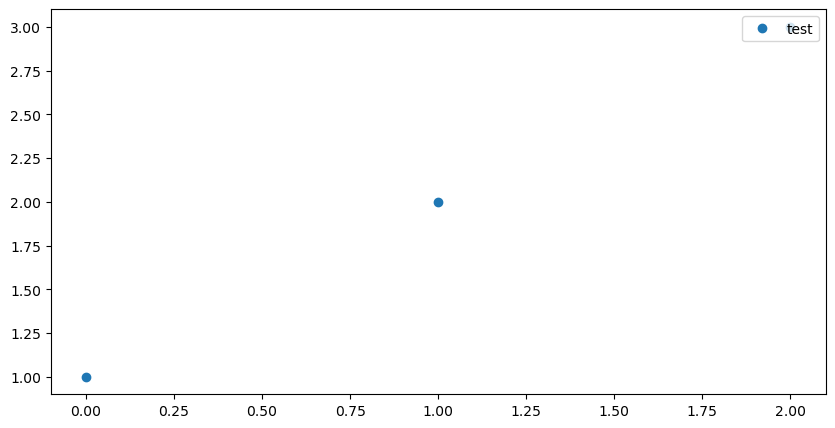

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
test = np.array([1,2,3])
ax.plot(test, 'o', label='test')
ax.legend(loc='upper right')

# Labelling plots

### Axes labels and text

set_xlabel, set_ylabel, and set_title are used to add text in the indicated locations (see Text in Matplotlib Plots for more discussion). Text can also be directly added to plots using text:

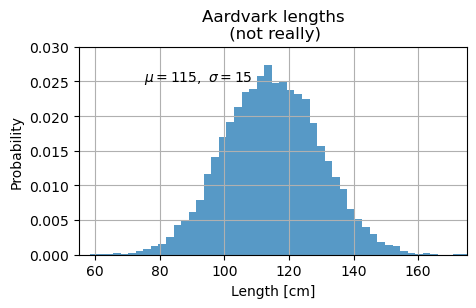

In [26]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7))
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

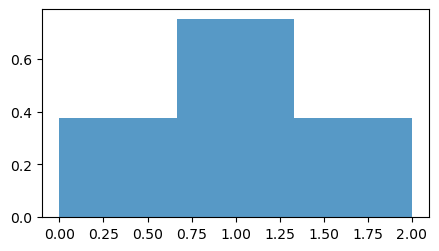

In [27]:
x = [0, 1, 1, 2]
fig, ax = plt.subplots(figsize=(5, 2.7))
# 其中x是数据，50表示将数据分成50个区间，density=True表示将直方图转换为概率密度直方图，
# facecolor='C0'表示直方图的颜色为蓝色，
# alpha=0.75表示直方图的透明度为0.75。
# 函数返回的n是每个区间内的数据个数，
# bins是每个区间的边界值，
# patches是每个区间的图形对象。
n, bins, patches = ax.hist(x, 3, density=True, facecolor='C0', alpha=0.75)


In [28]:
# n是每个区间内的数据个数
n

array([0.375, 0.75 , 0.375])

In [29]:
# bins是每个区间的边界值，patches是每个区间的图形对象
bins

array([0.        , 0.66666667, 1.33333333, 2.        ])

All of the text functions return a matplotlib.text.Text instance. Just as with lines above, you can customize the properties by passing keyword arguments into the text functions:

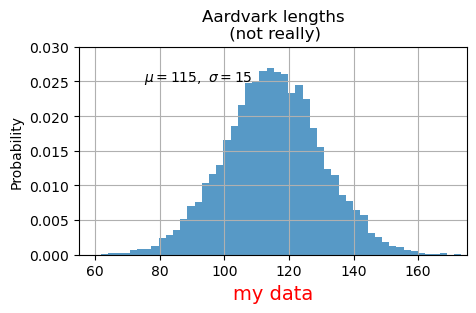

In [30]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7))
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)
t = ax.set_xlabel('my data', fontsize=14, color='red')

### Using [mathematical expressions](https://matplotlib.org/stable/tutorials/text/mathtext.html) in text
Matplotlib accepts TeX equation expressions in any text expression. For example to write the expression 
 in the title, you can write a TeX expression surrounded by dollar signs:

In [31]:
ax.set_title(r'$\sigma_i=15$')

Text(0.5, 1.0, '$\\sigma_i=15$')

### Annotations


We can also annotate points on a plot, often by connecting an arrow pointing to xy, to a piece of text at xytext:

(-2.0, 3.0)

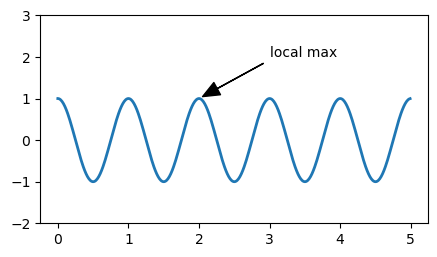

In [32]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
# lw linewidth
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 2),
            arrowprops=dict(facecolor='black', width=0.1, shrink=0.05, headwidth=10))

ax.set_ylim(-2, 3)

### Legends

Often we want to identify lines or markers with a Axes.legend:

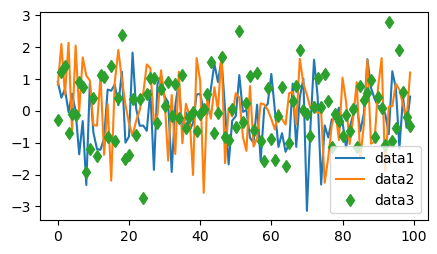

In [33]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3,  'd',label='data3')
ax.legend()

Legends in Matplotlib are quite flexible in layout, placement, and what Artists they can represent. They are discussed in detail in [Legend guide](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html).

# Axis scales and ticks

Each Axes has two (or three) Axis objects representing the x- and y-axis. These control the scale of the Axis, the tick locators and the tick formatters. Additional Axes can be attached to display further Axis objects.

### Scales

In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale. Since log-scales are used so much there are also direct methods like loglog, semilogx, and semilogy. There are a number of scales (see Scales for other examples). Here we set the scale manually:

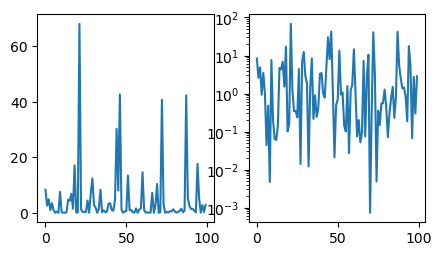

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(7, 2.7))
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

The scale sets the mapping from data values to spacing along the Axis. This happens in both directions, and gets combined into a transform, which is the way that Matplotlib maps from data coordinates to Axes, Figure, or screen coordinates. See Transformations Tutorial.

In [35]:
test = np.array([1, 2, 3])
10 ** test

array([  10,  100, 1000], dtype=int32)

### Tick locators and formatters
Each Axis has a tick locator and formatter that choose where along the Axis objects to put tick marks. A simple interface to this is set_xticks:

Text(0.5, 1.0, 'Manual ticks')

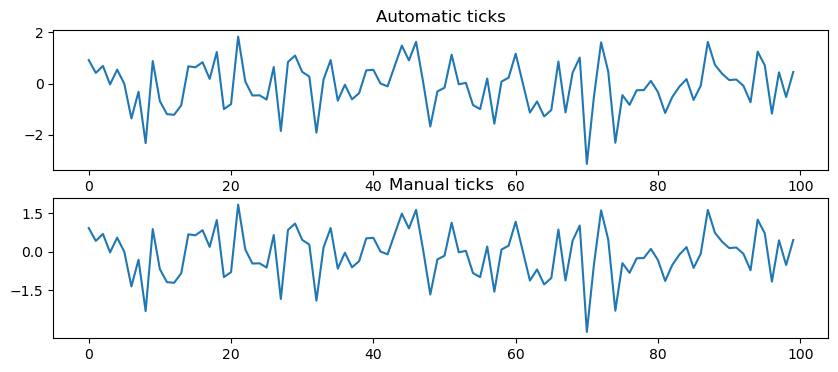

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize= (10, 4))
ax1.plot(xdata, data1)
ax1.set_title('Automatic ticks')

ax2.plot(xdata, data1)
# ax2.set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
ax2.set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
ax2.set_title('Manual ticks')

### Plotting dates and strings

Matplotlib can handle plotting arrays of dates and arrays of strings, as well as floating point numbers. These get special locators and formatters as appropriate. For dates:

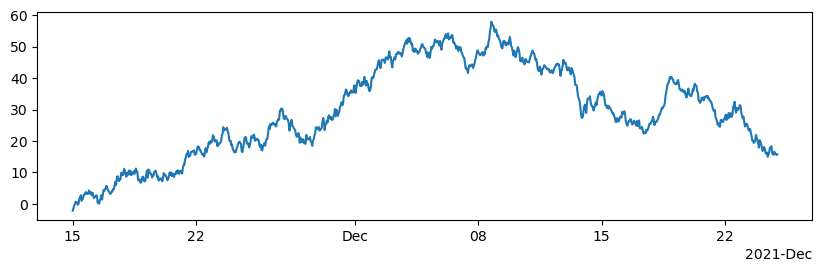

In [37]:
fig, ax = plt.subplots(figsize=(10, 2.7))
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
# cdf = mpl.dates.ConciseDateFormatter(mpl.dates.AutoDateLocator())


ax.xaxis.set_major_formatter(cdf)

For more information see the date examples (e.g. [Date tick labels](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))


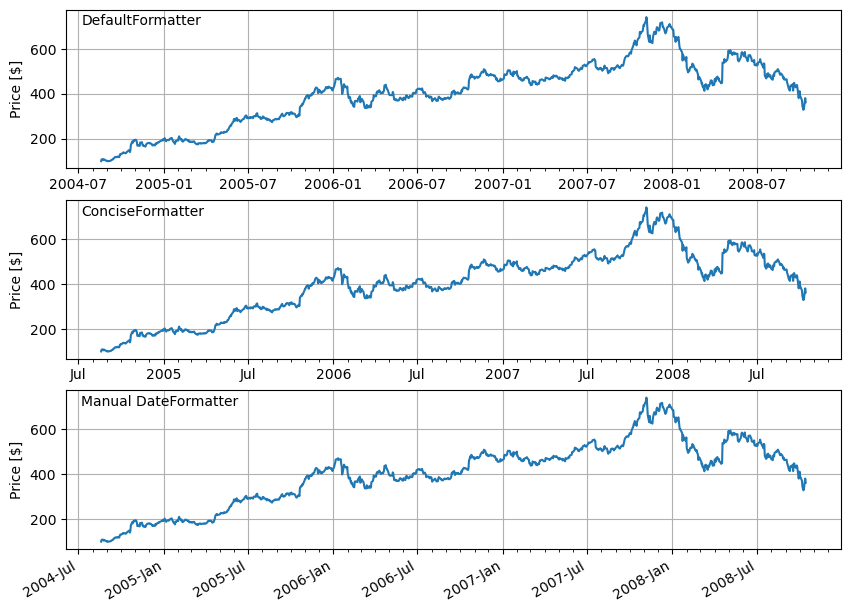

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, high,
# low, close, volume, adj_close from the mpl-data/sample_data directory. The
# record array stores the date as an np.datetime64 with a day unit ('D') in
# the date column.
data = cbook.get_sample_data('goog.npz', np_load=True)['price_data']

fig, axs = plt.subplots(3, 1, figsize=(10, 7))
# common to all three:
for ax in axs:
    ax.plot('date', 'adj_close', data=data)
    # Major ticks every half year, minor ticks every month,
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.set_ylabel(r'Price [\$]')

# different formats:
ax = axs[0]
ax.set_title('DefaultFormatter', loc='left', y=0.85, x=0.02, fontsize='medium')

ax = axs[1]
ax.set_title('ConciseFormatter', loc='left', y=0.85, x=0.02, fontsize='medium')
ax.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

ax = axs[2]
ax.set_title('Manual DateFormatter', loc='left', y=0.85, x=0.02,
             fontsize='medium')
# Text in the x-axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

For strings, we get categorical plotting (see: [Plotting categorical variables](https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html)).

<BarContainer object of 4 artists>

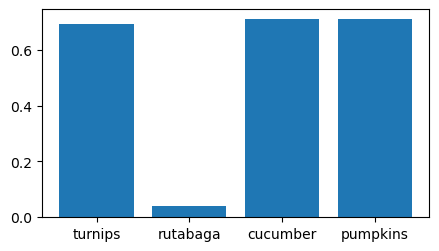

In [39]:
fig, ax = plt.subplots(figsize=(5, 2.7))
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)))

### Additional Axis objects
Plotting data of different magnitude in one chart may require an additional y-axis. Such an Axis can be created by using [twinx](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html#matplotlib.axes.Axes.twinx) to add a new Axes with an invisible x-axis and a y-axis positioned at the right (analogously for [twiny](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twiny.html#matplotlib.axes.Axes.twiny)). See [Plots with different scales](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html) for another example.

Similarly, you can add a secondary_xaxis or secondary_yaxis having a different scale than the main Axis to represent the data in different scales or units. See Secondary Axis for further examples.

Text(0.5, 0, 'Angle [°]')

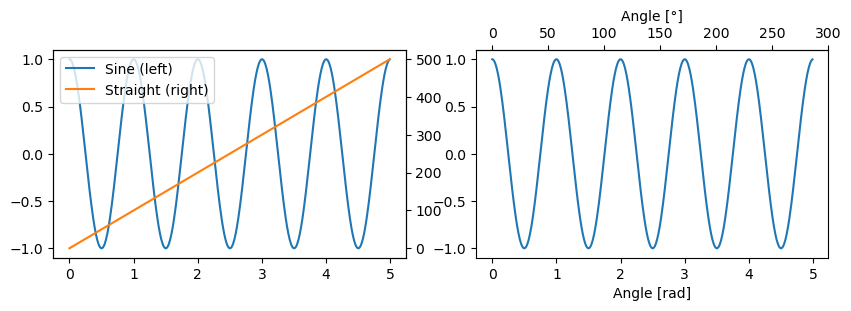

In [40]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 2.7))
# l1是返回的Line2D对象，可以用于设置线条的样式和属性
l1, = ax1.plot(t, s)
# 创建了一个新的y轴对象ax2
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
# secondary_xaxis()方法用于创建次坐标轴，
# 'top'参数表示将次坐标轴放置在图形的顶部，
# functions参数是一个元组，用于指定转换函数，这里使用了np.rad2deg和np.deg2rad函数，
# 分别用于将弧度转换为角度和将角度转换为弧度。最终，将创建的次坐标轴对象赋值给ax4变量。
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

# Color mapped data

Often we want to have a third dimension in a plot represented by a colors in a colormap. Matplotlib has a number of plot types that do this:

C:\Users\10973\AppData\Local\Temp\ipykernel_4136\1016045382.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')


Text(0.5, 1.0, 'scatter()')

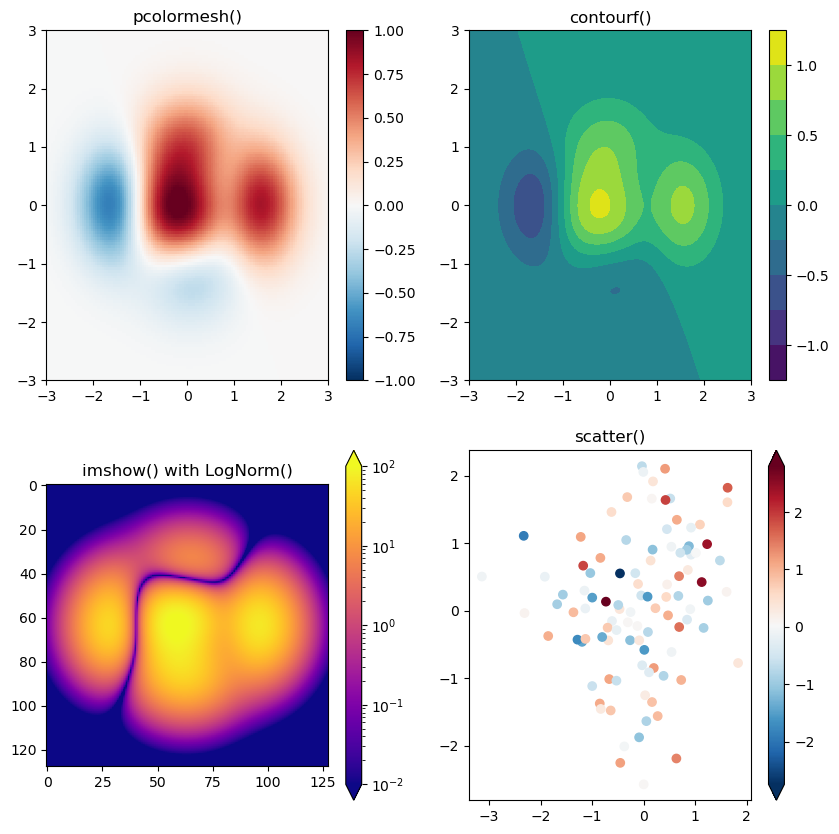

In [41]:
# meshgrid函数，用于生成二维网格坐标矩阵
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

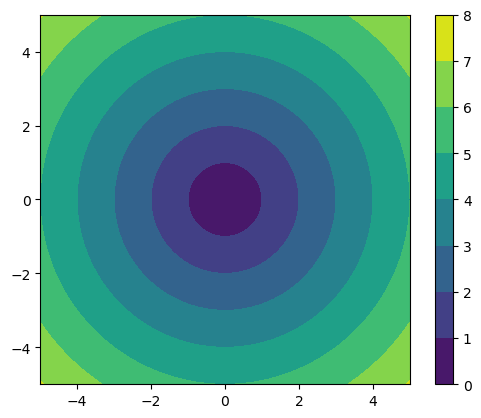

In [42]:
x = np.linspace(-5, 5, 101)
y = np.linspace(-5, 5, 101)
# full coordinate arrays
xx, yy = np.meshgrid(x, y)
zz = np.sqrt(xx**2 + yy**2)
xx.shape, yy.shape, zz.shape


# sparse coordinate arrays
xs, ys = np.meshgrid(x, y, sparse=True)
zs = np.sqrt(xs**2 + ys**2)
xs.shape, ys.shape, zs.shape


h = plt.contourf(x, y, zs)
plt.axis('scaled')
plt.colorbar()
plt.show()


### Colormaps
These are all examples of Artists that derive from ScalarMappable objects. They all can set a linear mapping between vmin and vmax into the colormap specified by cmap. Matplotlib has many colormaps to choose from (Choosing Colormaps in Matplotlib) you can make your own (Creating Colormaps in Matplotlib) or download as third-party packages.

### Normalizations
Sometimes we want a non-linear mapping of the data to the colormap, as in the LogNorm example above. We do this by supplying the ScalarMappable with the norm argument instead of vmin and vmax. More normalizations are shown at Colormap Normalization.

### Colorbars
Adding a colorbar gives a key to relate the color back to the underlying data. Colorbars are figure-level Artists, and are attached to a ScalarMappable (where they get their information about the norm and colormap) and usually steal space from a parent Axes. Placement of colorbars can be complex: see Placing Colorbars for details. You can also change the appearance of colorbars with the extend keyword to add arrows to the ends, and shrink and aspect to control the size. Finally, the colorbar will have default locators and formatters appropriate to the norm. These can be changed as for other Axis objects.

# Working with multiple Figures and Axes
You can open multiple Figures with multiple calls to fig = plt.figure() or fig2, ax = plt.subplots(). By keeping the object references you can add Artists to either Figure.

Multiple Axes can be added a number of ways, but the most basic is plt.subplots() as used above. One can achieve more complex layouts, with Axes objects spanning columns or rows, using [subplot_mosaic](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot_mosaic.html#matplotlib.pyplot.subplot_mosaic).

Text(0.5, 1.0, 'right')

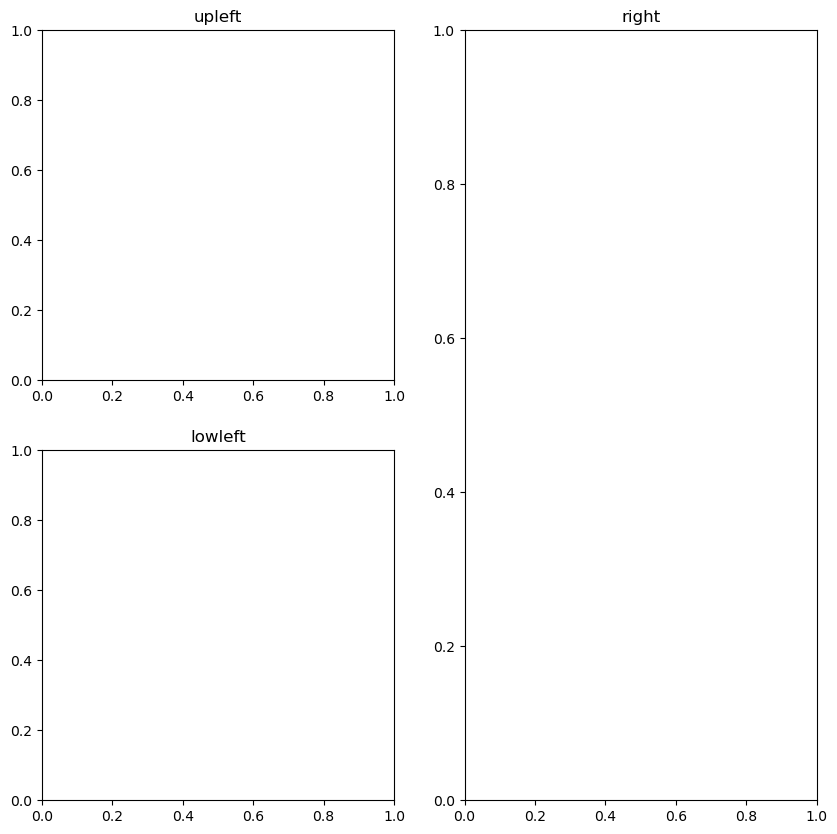

In [44]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], figsize=(10, 10))
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')